# Final Project

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fft
from sklearn.linear_model import LinearRegression

## Filtering and Fast Fourier Transform

In [2]:
data = pd.read_excel(r'C:\Users\Gio Vincent\OneDrive\Documents\DIGITAL SIGNAL PROCESSING\Final Project\Final_IOT.xlsx', sheet_name="Sheet1")

# Check for missing values
print(data.isnull().sum())

# Remove non-numeric entries if necessary
data['Temperature'] = pd.to_numeric(data['Temperature'], errors='coerce')
data['Humidity'] = pd.to_numeric(data['Humidity'], errors='coerce')
data['pH'] = pd.to_numeric(data['pH'], errors='coerce')

# Fill missing values with mean of each column
data[['Temperature', 'Humidity', 'pH']] = data[['Temperature', 'Humidity', 'pH']].fillna(data[['Temperature', 'Humidity', 'pH']].mean())

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set Timestamp as index
data.set_index('Timestamp', inplace=True)

# Define a Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

fs = 1  # 1 sample per day


cutoff_temperature = 0.1  
cutoff_humidity = 0.1    
cutoff_ph = 0.1           

# Apply filtering to each signal
filtered_temperature = lowpass_filter(data['Temperature'].to_numpy(), cutoff_temperature, fs)
filtered_humidity = lowpass_filter(data['Humidity'].to_numpy(), cutoff_humidity, fs)
filtered_ph = lowpass_filter(data['pH'].to_numpy(), cutoff_ph, fs)

# Perform FFT on filtered signals
fft_temperature = fft(filtered_temperature)
fft_humidity = fft(filtered_humidity)
fft_ph = fft(filtered_ph)

# Calculate frequencies for plotting
n = len(data)
frequencies = np.fft.fftfreq(n, d=1/fs)  # d is the sample spacing (1 day in this case)

# Calculate correlation matrix
correlation_matrix = data[['Temperature', 'Humidity', 'pH']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Timestamp      0
Temperature    0
Humidity       0
pH             0
dtype: int64
Correlation Matrix:
             Temperature  Humidity        pH
Temperature     1.000000 -0.079601 -0.065943
Humidity       -0.079601  1.000000 -0.168512
pH             -0.065943 -0.168512  1.000000


## Plotting of Original and Filtered Temperature, Humidity, and pH Level

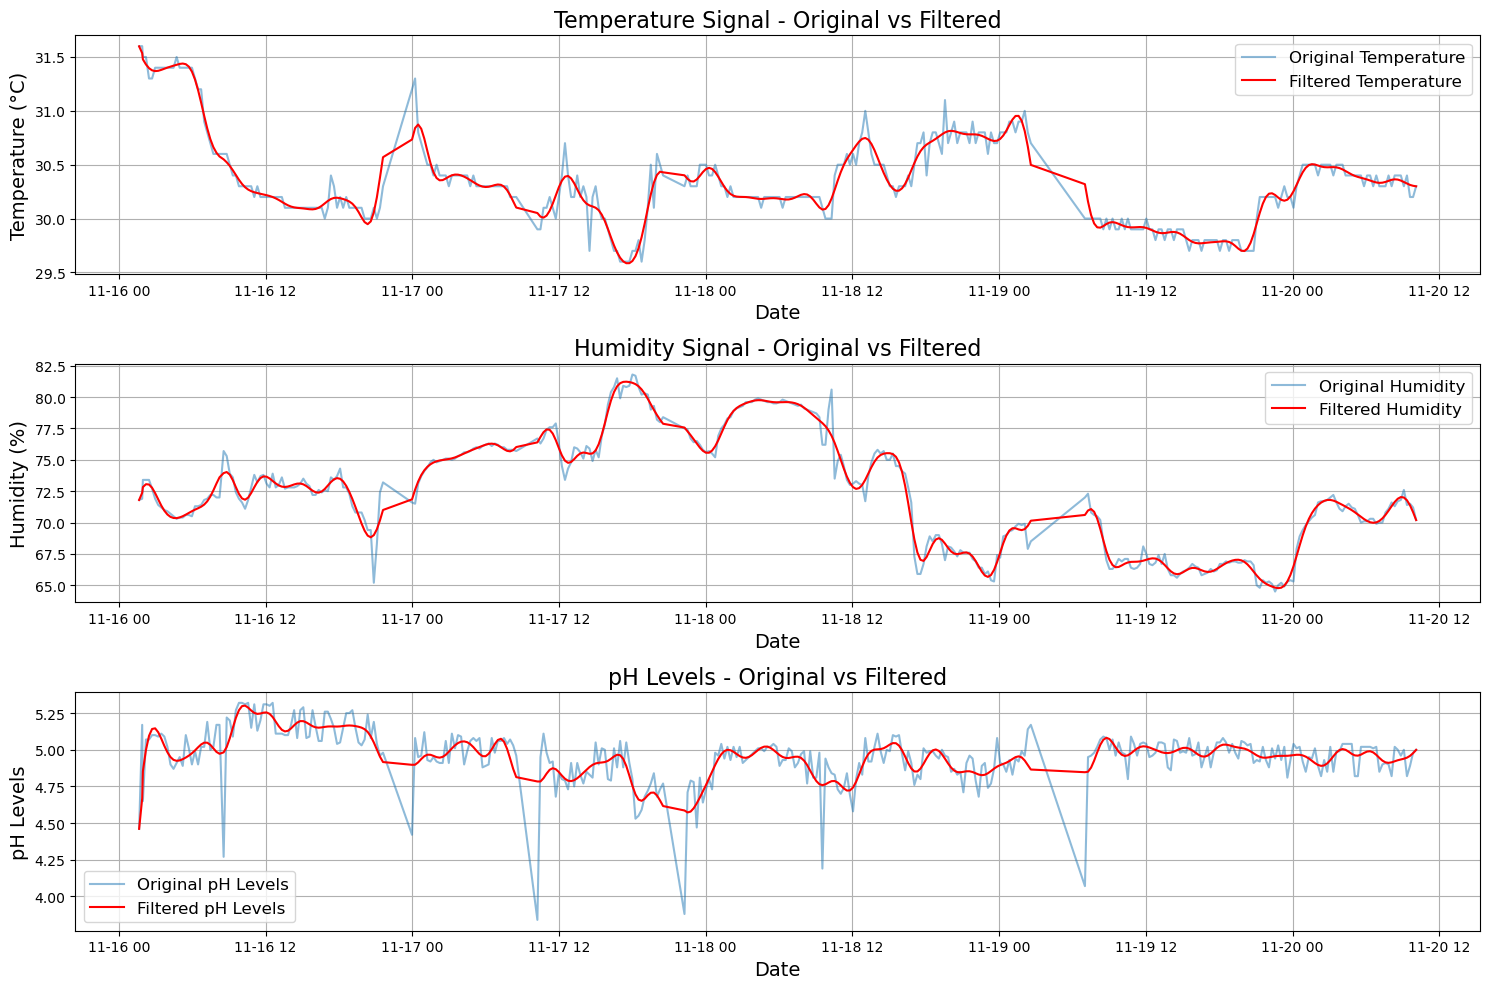

In [3]:
plt.figure(figsize=(15, 10))

# Temperature Plot
plt.subplot(3, 1, 1)
plt.plot(data.index, data['Temperature'], label='Original Temperature', alpha=0.5)
plt.plot(data.index, filtered_temperature, label='Filtered Temperature', color='red')
plt.title('Temperature Signal - Original vs Filtered', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Humidity Plot
plt.subplot(3, 1, 2)
plt.plot(data.index, data['Humidity'], label='Original Humidity', alpha=0.5)
plt.plot(data.index, filtered_humidity, label='Filtered Humidity', color='red')
plt.title('Humidity Signal - Original vs Filtered', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# pH Plot
plt.subplot(3, 1, 3)
plt.plot(data.index, data['pH'], label='Original pH Levels', alpha=0.5)
plt.plot(data.index, filtered_ph, label='Filtered pH Levels', color='red')
plt.title('pH Levels - Original vs Filtered', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('pH Levels', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

## FFT Plot of Temperature, Humidity, and pH Level

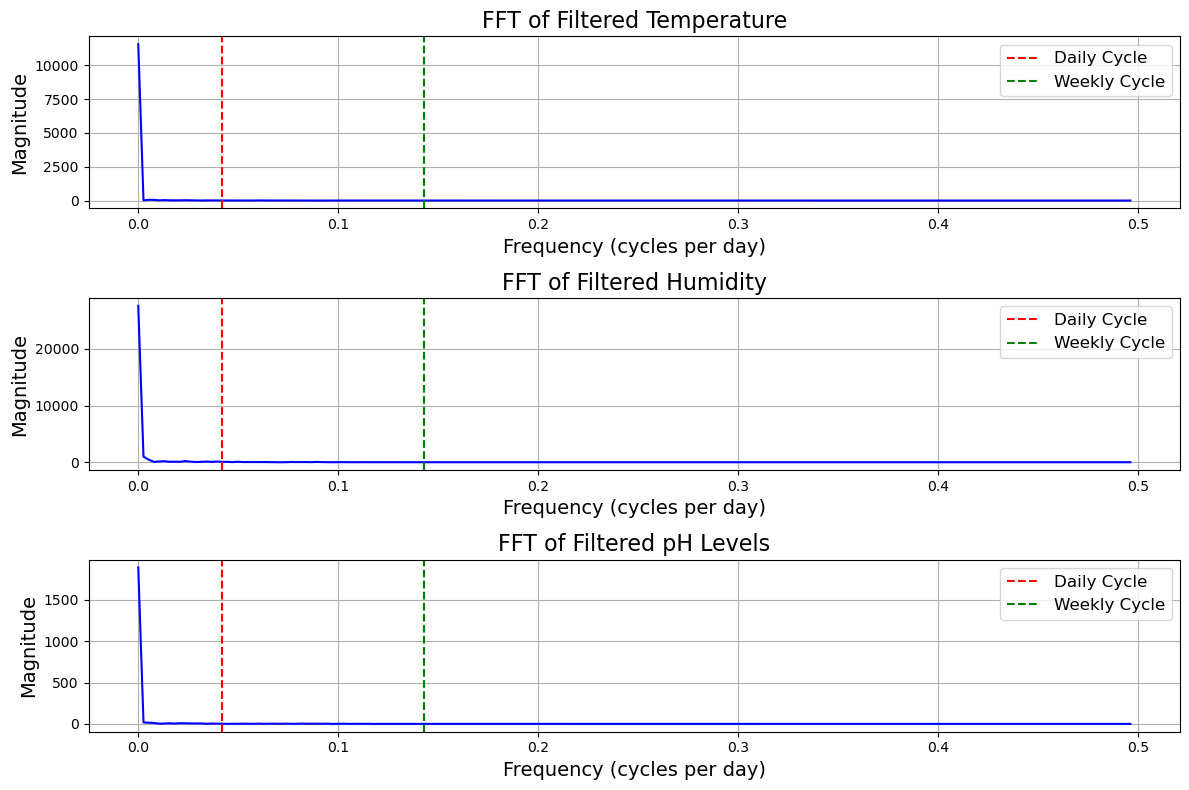

In [4]:
plt.figure(figsize=(12, 8))  

# Temperature FFT Plot
plt.subplot(3, 1, 1)
plt.plot(frequencies[:n // 2], np.abs(fft_temperature)[:n // 2], color='blue')
plt.title('FFT of Filtered Temperature', fontsize=16)
plt.xlabel('Frequency (cycles per day)', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.axvline(x=0.0417, color='r', linestyle='--', label='Daily Cycle')
plt.axvline(x=0.1429, color='g', linestyle='--', label='Weekly Cycle')
plt.legend(fontsize=12)
plt.grid(True)

# Humidity FFT Plot
plt.subplot(3, 1, 2)
plt.plot(frequencies[:n // 2], np.abs(fft_humidity)[:n // 2], color='blue')
plt.title('FFT of Filtered Humidity', fontsize=16)
plt.xlabel('Frequency (cycles per day)', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.axvline(x=0.0417, color='r', linestyle='--', label='Daily Cycle')
plt.axvline(x=0.1429, color='g', linestyle='--', label='Weekly Cycle')
plt.legend(fontsize=12)
plt.grid(True)

# pH FFT Plot
plt.subplot(3, 1, 3)
plt.plot(frequencies[:n // 2], np.abs(fft_ph)[:n // 2], color='blue')
plt.title('FFT of Filtered pH Levels', fontsize=16)
plt.xlabel('Frequency (cycles per day)', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.axvline(x=0.0417, color='r', linestyle='--', label='Daily Cycle')
plt.axvline(x=0.1429, color='g', linestyle='--', label='Weekly Cycle')
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

## Plotting of Correlation between Temperature and pH Level, and Humidity and pH Level

C:\Users\Gio Vincent\AppData\Local\Temp\ipykernel_24552\1892173194.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_scatter.show()


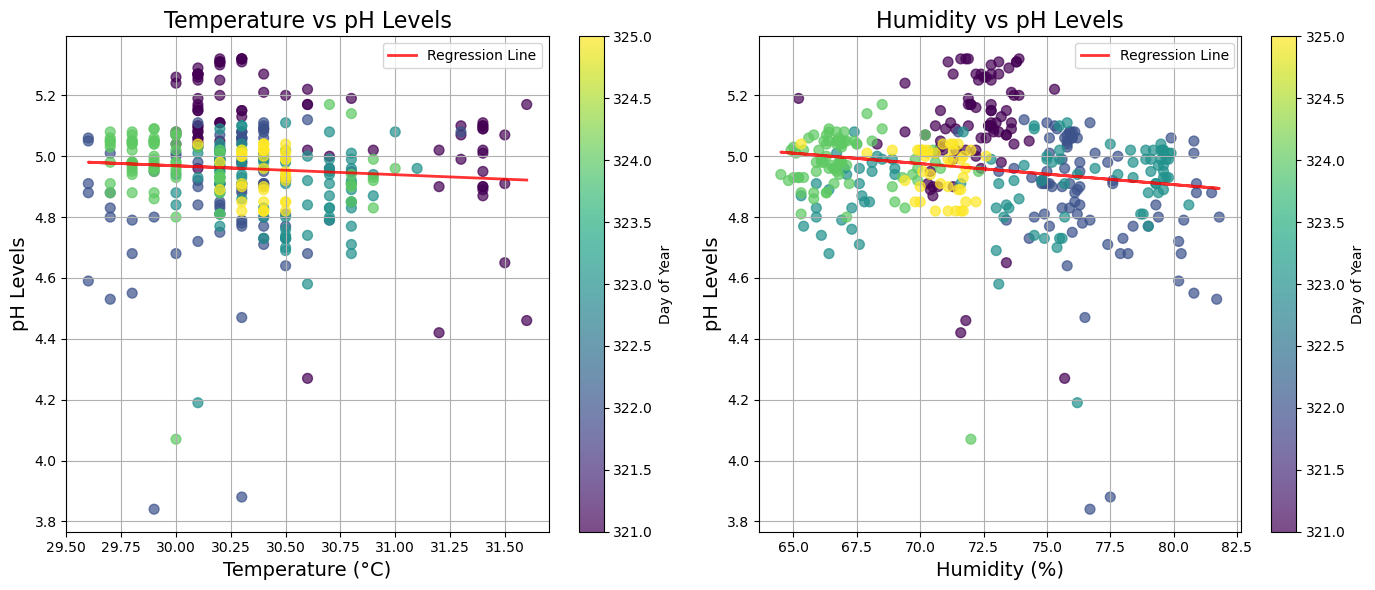

In [5]:
fig_scatter = plt.figure(figsize=(14, 6))

# Scatter plot for Temperature vs pH
ax1 = fig_scatter.add_subplot(121) 
sc_temp_ph = ax1.scatter(data['Temperature'], data['pH'], c=data.index.dayofyear,
                          cmap='viridis', s=50, alpha=0.7) 
ax1.set_title('Temperature vs pH Levels', fontsize=16) 
ax1.set_xlabel('Temperature (°C)', fontsize=14) 
ax1.set_ylabel('pH Levels', fontsize=14) 
ax1.grid(True) 
fig_scatter.colorbar(sc_temp_ph, ax=ax1).set_label('Day of Year')

# Fit a linear regression line for Temperature vs pH
model_temp_ph = LinearRegression()
model_temp_ph.fit(data[['Temperature']], data['pH'])
predicted_ph_temp = model_temp_ph.predict(data[['Temperature']])
ax1.plot(data['Temperature'], predicted_ph_temp,
         color='red', linewidth=2,
         alpha=0.8,
         label='Regression Line')
ax1.legend()

# Scatter plot for Humidity vs pH
ax2 = fig_scatter.add_subplot(122) 
sc_humid_ph = ax2.scatter(data['Humidity'], data['pH'], c=data.index.dayofyear,
                           cmap='viridis', s=50,
                           alpha=0.7) 
ax2.set_title('Humidity vs pH Levels', fontsize=16) 
ax2.set_xlabel('Humidity (%)', fontsize=14) 
ax2.set_ylabel('pH Levels', fontsize=14) 
ax2.grid(True) 
fig_scatter.colorbar(sc_humid_ph, ax=ax2).set_label('Day of Year')

# Fit a linear regression line for Humidity vs pH
model_humid_ph = LinearRegression()
model_humid_ph.fit(data[['Humidity']], data['pH'])
predicted_ph_humid = model_humid_ph.predict(data[['Humidity']])
ax2.plot(data['Humidity'], predicted_ph_humid,
         color='red',
         linewidth=2,
         alpha=0.8,
         label='Regression Line')
ax2.legend()

fig_scatter.tight_layout()
fig_scatter.show()